## Aula 5 - Agregação com Pandas e Conceitos de Estatística

### Agregação com Pandas

In [1]:
import pandas as pd
import numpy as np

#### Exemplo de Group By com Pandas

In [2]:
# Criando um dataframe
df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'], 
                   'key2' : ['one', 'two', 'one', 'two', 'one'],
                   'data1' : np.random.randn(5), 'data2' : np.random.randn(5)})
df

,key1,key2,data1,data2
0,a,one,-1.982000,-1.296254
1,a,two,0.066750,0.557281
2,b,one,-1.880014,-1.280639
3,b,two,-0.212214,-1.345701
4,a,one,-1.941148,-0.985615


In [3]:
# Criar um objeto de agrupamento da coluna data1 agrupando por key1
grouped = df['data1'].groupby(df['key1'])
# Veja que o resultado retornado é um objeto Pyhton SeriesGroupBy 
grouped

In [4]:
# Aplicando a métrica Média (mean) sobre esse objeto de agrupamento
# Perceba que a média sobre o objeto SeriesGroupBy vai retornar uma Series como resultado,
#   e o índice será a coluna de agrupamento key1
grouped.mean()

key1
a   -1.285466
b   -1.046114
Name: data1, dtype: float64

#### Agregação com duas colunas

In [5]:
# Criar um objeto de agrupamento da coluna data1 agrupando por key1 e key2
means = df['data1'].groupby([df['key1'], df['key2']]).mean()
# Veja que means é uma Series com índices key1 e key2
means

key1  key2
a     one    -1.961574
      two     0.066750
b     one    -1.880014
      two    -0.212214
Name: data1, dtype: float64

In [6]:
# Curiosidade: você pode pivotar essa série com o médoto unstack()
means.unstack()

key2,one,two
key1,,
a,-1.961574,0.066750
b,-1.880014,-0.212214


#### Agregação com vetor do tamanho do índice

In [7]:
# Considere o dataframe df definido anteriormente e os arrays states e years
states = np.array(['Ohio', 'California', 'California', 'Ohio', 'Ohio'])
years = np.array([2005, 2005, 2006, 2005, 2006])
# Crie um agrupamento da coluna data1 considerando como colunas de agrupamento os arrays
#    states e years
df['data1'].groupby([states, years]).mean()

California  2005    0.066750
            2006   -1.880014
Ohio        2005   -1.097107
            2006   -1.941148
Name: data1, dtype: float64

#### Aplicando a métrica em todas as colunas de dados

In [8]:
# Agrupe o dataframe df por key1 e extraia a média de todas as colunas
df.groupby('key1').mean()

,data1,data2
key1,,
a,-1.285466,-0.574862
b,-1.046114,-1.313170


In [9]:
# perceba que o objeto retornado pelo agrupamento do dataframe inteiro é 
#   um DataFrameGroupBy 
df.groupby('key1')

In [10]:
# Agrupe o dataframe inteiro pelas colunas key1 e key2 calculando o valor da média
#    para as outras colunas.
df.groupby(['key1', 'key2']).mean()

data1     data2
key1 key2                    
a    one  -1.961574 -1.140934
     two   0.066750  0.557281
b    one  -1.880014 -1.280639
     two  -0.212214 -1.345701

#### Mostrando o tamanho dos grupos

In [11]:
# Mostre o tamanho dos grupos de um agrupamento do dataframe df pelas colunas key1 e key2
df.groupby(['key1', 'key2']).size()

key1  key2
a     one     2
      two     1
b     one     1
      two     1
dtype: int64

#### Agrupando com uma função

In [12]:
# Considere o seguinte dataframe
people = pd.DataFrame(np.random.randn(5, 5),columns=['a', 'b', 'c', 'd', 'e'], 
                      index=['Joe', 'Steve', 'Wes', 'Jim', 'Travis'])
people.iloc[2:3, [1, 2]] = np.nan # Adicionando alguns valores NA
people

,a,b,c,d,e
Joe,-0.629954,0.655833,1.408205,-0.211461,1.120677
Steve,1.146877,-0.036895,0.688961,0.738231,0.310309
Wes,1.282731,NaN,NaN,0.312816,2.223868
Jim,1.429975,-0.935962,-0.195708,-0.473388,-0.048065
Travis,-0.388942,0.719341,-1.731217,-1.016246,0.767809


In [13]:
# Agrupe o dataframe people pelo tamanho das strings do indice retornando a soma de cada
#    grupo.
people.groupby(len).sum()



,a,b,c,d,e
3,2.082752,-0.280128,1.212497,-0.372033,3.296480
5,1.146877,-0.036895,0.688961,0.738231,0.310309
6,-0.388942,0.719341,-1.731217,-1.016246,0.767809


#### Aplicando várias métricas ao mesmo tempo

In [14]:
# Considere o seguinte dataset de gorgetas (tips)
import pandas as pd
import io # Biblioteca com funções de IO (dentre elas de Strings)
import requests #Biblioteca para fazer requisições HTTP
url="https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/examples/tips.csv"
s=requests.get(url).content
tips=pd.read_csv(io.StringIO(s.decode('utf-8')))
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [15]:
# Adiciona uma coluna para calcular a porcentage da gorjeta em relação ao valor da conta
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips[:6]

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808
5,25.29,4.71,No,Sun,Dinner,4,0.186240


In [16]:
# Agrupar por dia da semana (day) e fumante (smoker)
grouped = tips.groupby(['day', 'smoker'])
grouped

In [17]:
# Pegar um slice (uma fatia) do objeto de agrupamento com apenas a coluna tip_pct
grouped_pct = grouped[['tip_pct']]
grouped_pct

In [18]:
# Calcular a média deste agrupamento
grouped_pct.agg('mean')

tip_pct
day  smoker          
Fri  No      0.151650
     Yes     0.174783
Sat  No      0.158048
     Yes     0.147906
Sun  No      0.160113
     Yes     0.187250
Thur No      0.160298
     Yes     0.163863

In [19]:
# Considere a função para retornar o intervalo de variação de um array
def peak_to_peak(arr):
    return arr.max() - arr.min()

In [20]:
# Escreva numa só sentença a aplicação das métricas média, desvio padrão (std) 
#   e peak_to_peak ao slice do agrupamento criado acima
grouped_pct.agg(['mean', 'std', peak_to_peak])

tip_pct                       
                 mean       std peak_to_peak
day  smoker                                 
Fri  No      0.151650  0.028123     0.067349
     Yes     0.174783  0.051293     0.159925
Sat  No      0.158048  0.039767     0.235193
     Yes     0.147906  0.061375     0.290095
Sun  No      0.160113  0.042347     0.193226
     Yes     0.187250  0.154134     0.644685
Thur No      0.160298  0.038774     0.193350
     Yes     0.163863  0.039389     0.151240

#### Várias métricas em diferentes colunas

In [21]:
# Usando um dicionário para mapear as colunas e suas respectivas métricas, aplique
#     à coluna tip_pct as métricas 'min', 'max', 'mean', 'std' e 
grouped.agg({'tip_pct' : ['min', 'max', 'mean', 'std'], 'size' : 'sum'})

tip_pct                               size
                  min       max      mean       std  sum
day  smoker                                             
Fri  No      0.120385  0.187735  0.151650  0.028123    9
     Yes     0.103555  0.263480  0.174783  0.051293   31
Sat  No      0.056797  0.291990  0.158048  0.039767  115
     Yes     0.035638  0.325733  0.147906  0.061375  104
Sun  No      0.059447  0.252672  0.160113  0.042347  167
     Yes     0.065660  0.710345  0.187250  0.154134   49
Thur No      0.072961  0.266312  0.160298  0.038774  112
     Yes     0.090014  0.241255  0.163863  0.039389   40

### Conceitos básicos de Estatística Descritiva

#### Variaveis categóricas

In [22]:
# Categorias são inferidas a partir dos dados e são não ordenadas
df = pd.DataFrame({'A': list('abca'), 'B': list('bccd')}, dtype="category")
df_cat = df.astype('category')
df_cat.dtypes

A    category
B    category
dtype: object

In [23]:
# Também é possível converter os tipos de um dataframe para category
df = pd.DataFrame({'A': list('abca'), 'B': list('bccd')})
df_cat = df.astype('category')
df_cat.dtypes

A    category
B    category
dtype: object

In [24]:
# Criando dados categóricos ordenados
from pandas.api.types import CategoricalDtype
s = pd.Series(["a", "b", "c", "a"])
cat_type = CategoricalDtype(categories=["b", "c", "d"], ordered=True)
s_cat = s.astype(cat_type)
s_cat

0    NaN
1      b
2      c
3    NaN
dtype: category
Categories (3, object): ['b' < 'c' < 'd']

#### Amostragem

In [25]:
df = pd.DataFrame({'num_legs': [2, 4, 8, 0],
                   'num_wings': [2, 0, 0, 0],
                   'num_specimen_seen': [10, 2, 1, 8]},
                  index=['falcon', 'dog', 'spider', 'fish'])
df

,num_legs,num_wings,num_specimen_seen
falcon,2,2,10
dog,4,0,2
spider,8,0,1
fish,0,0,8


In [26]:
# Criar, com o método sample, uma amostra aleatória de 3 elementos com um 
# estado aleatório conhecido. O estado aleatorio é utilizado para assegurar
# reproducibilidade de um experimento.
df['num_legs'].sample(n=3, random_state=10)

spider    8
falcon    2
fish      0
Name: num_legs, dtype: int64

In [27]:
# Criar uma amostra aleatoria com 50% dos elementos, estado aleatório conhecido e 
# com reposição
df.sample(frac=0.5, replace=True, random_state=1)

,num_legs,num_wings,num_specimen_seen
dog,4,0,2
fish,0,0,8


In [28]:
# Pode-se fazer um upsample, mas o parâmetro replace deve ser True
df.sample(frac=2, replace=True, random_state=1)

,num_legs,num_wings,num_specimen_seen
dog,4,0,2
fish,0,0,8
falcon,2,2,10
falcon,2,2,10
fish,0,0,8
dog,4,0,2
fish,0,0,8
dog,4,0,2


In [29]:
# Histograma
mm = 168 # média 
sigmam = 5 # desvio padrão
samples = 500
np.random.seed(0)
altura_m = np.random.normal(mm, sigmam, samples).astype(int)

mh = 176 # média
sigmah = 6 # desvio padrão
sample = 500
np.random.seed(1)
altura_h = np.random.normal(mh, sigmah, sample).astype(int)
df_altura = pd.DataFrame({'altura_h': altura_h, 'altura_m': altura_m})
df_altura.head()

,altura_h,altura_m
0,185,176
1,172,170
2,172,172
3,169,179
4,181,177


array([[<AxesSubplot:title={'center':'altura_h'}>,
        <AxesSubplot:title={'center':'altura_m'}>]], dtype=object)

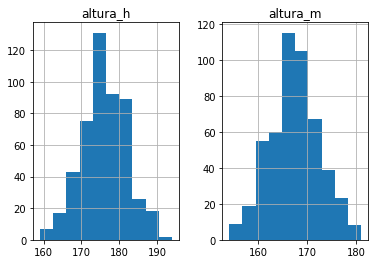

In [30]:
# Criar o histograma dos dados no dataframe df_altura
df_altura.hist()

array([[<AxesSubplot:title={'center':'altura_h'}>,
        <AxesSubplot:title={'center':'altura_m'}>]], dtype=object)

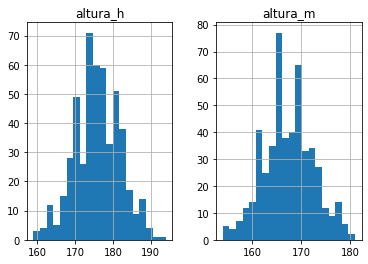

In [31]:
# Criar o histograma dos dados no dataframe df_altura especificando a quantidade de bins 
df_altura.hist(bins=20)

#### Mediana

In [32]:
# Considere o seguinte dataframe  
df = pd.DataFrame({"a":[112, 42, 5, 1, 1, 1, 1, 2, 7,8], 
                   "b":[37, 42, 5424, 311, 5345, 1234, 9098, 1, 5, None],  
                   "c":[210, 416, 114, None, 8, 5, 6, 23, 67, 234],  
                   "d":[144, 23, 1, 45, 890, 1, 234, 43, 12, 62]}) 
df

,a,b,c,d
0,112,37.0,210.0,144
1,42,42.0,416.0,23
2,5,5424.0,114.0,1
3,1,311.0,NaN,45
4,1,5345.0,8.0,890
5,1,1234.0,5.0,1
6,1,9098.0,6.0,234
7,2,1.0,23.0,43
8,7,5.0,67.0,12
9,8,NaN,234.0,62


In [33]:
# Calcule a mediana dos valores das colunas (axis=0)
df.median(axis = 0, skipna = True) 

a      3.5
b    311.0
c     67.0
d     44.0
dtype: float64

#### Quartis

In [34]:
# Considere o seguinte dataframe do PIB dos municípios
path_pib = '../../curso_ciencia_dados2020/data/originais/pib/pib_municipios.xlsx'
df_pib = pd.read_excel(path_pib, skiprows=3, skipfooter=1, 
                       dtype={'Unnamed: 1': str, '2007': str}) 

# Descobrindo porque ocorre um erro ao se tentar ler a coluna 2007 como numero 
df_pib.loc[df_pib['2007'].apply(len) < 4,'2007']
# É porque os valores NA estão representados por ...
# Ler novamente o dataset especificando a string de NA
df_pib = pd.read_excel(path_pib, skiprows=3, skipfooter=1, na_values='...',
                       dtype={'Unnamed: 1': str, '2007': float, '2009': float, '2011': float})

df_pib.rename(columns={'Unnamed: 0': 'nivel', 'Unnamed: 1': 'cod_ibge7', 
                           'Unnamed: 2': 'municipio'}, inplace=True)

In [35]:
# Calcular os quartis 0.25, .5, .75 e o percentil 0.9 do dataframe do PIB em todos os
#   anos presentes no dataset.
quartis = df_pib.quantile([.25, .5, .75, .9])
quartis

,2007,2009,2011,2013,2015,2017
0.25,29649.0,37345.0,47401.0,59200.0,69344.00,79101.50
0.50,62828.0,79822.0,103029.0,130580.5,153323.00,176621.50
0.75,162696.5,206897.0,277615.0,345766.0,407994.25,470221.25
0.90,565636.1,683915.8,900978.8,1155242.4,1314377.80,1496154.70


<AxesSubplot:>

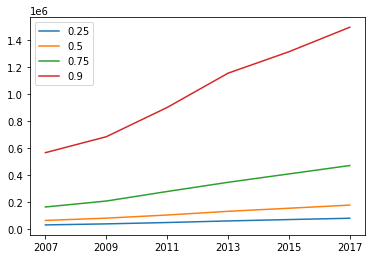

In [36]:
# Plotar num gráfico de linhas os percentis ao longo dos anos
# quartis.T retorna o dataframe transposto 
quartis.T.plot()

<AxesSubplot:>

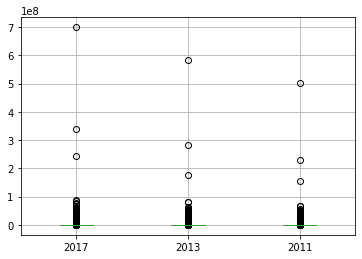

In [37]:
# Plote o boxplot de cada um dos anos ['2017', '2013', '2011'] do dataset do PIB
df_pib.boxplot(column=['2017', '2013', '2011'])